In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [35]:

#fingerprints = pd.read_csv("pubchemfprints.csv")
#fingerprints = pd.read_csv("criptors.csv")
fingerprints = pd.read_csv("morgan.csv")
#fingerprints = pd.read_csv("substructure.csv")
#fingerprints = pd.read_csv("MACCS.csv")
#fingerprints = pd.read_csv("AtomPairs2D.csv")
#fingerprints = pd.read_csv("mordred.csv")





#fingerprints = pd.read_csv("mold2.csv")
#fingerprints = fingerprints.drop("ReadIn_ID", axis=1)
#fingerprints = fingerprints.drop("USER_ID", axis=1)




#fingerprints = pd.read_csv("mordred.csv")
#fingerprints = fingerprints.select_dtypes(include=[np.number])
fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12488,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#data = pd.read_csv("combined.csv")
#data
data = pd.read_csv("pred.csv")
data.rename(columns = {'Standard_Value':'IC50'}, inplace = True)
data

,Smiles,Molecule_ChEMBL_ID,IC50
0,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,CHEMBL1336,0.588
1,Cc1cccc(NC(=O)c2cccc(N3CCc4nc(N)ncc4C3)c2)c1,CHEMBL3702603,114.000
2,Cc1ccc(-c2cc3nnnc(N4CCOCC4)c3[se]2)cc1,CHEMBL2377475,25118.860
3,Cc1cc(Oc2cc(NC(=O)C3CC3)ncn2)ccc1NC(=O)Nc1ccc(...,CHEMBL3904153,8.900
4,Cc1cc(Oc2cc(NC(=O)C3CC3)ncn2)ccc1NC(=O)Nc1cc(N...,CHEMBL3889762,12.500
...,...,...,...
12488,Cc1ccc(C)c(NC(=O)Nc2nc(Sc3c[nH]c4ccccc34)cc(N3...,CHEMBL4797072,310.000
12489,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,CHEMBL1336,90.000
12490,COc1ccc(NC(=O)Nc2ccc(C(=O)N/N=C3\C(=O)Nc4ccc(F...,CHEMBL4458736,3790.000
12491,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1,CHEMBL24828,22.000


In [37]:
#print ("Total number of rows in dataset = {}".format(df.shape[0]))
#print ("Total number of columns in dataset = {}".format(df.shape[1]))

In [38]:
#x = fingerprints.drop("Name", axis = 1)
x = fingerprints
y = data["IC50"]

In [39]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

# Linear Regression using statsmodels 

In [40]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)

In [41]:
results = model.fit()
results.params

Col_0       4.812423e-11
Col_1      -7.885831e+03
Col_2       5.754630e+03
Col_3       1.374291e+04
Col_4       1.659972e+04
                ...     
Col_2043    8.169721e+03
Col_2044    2.645713e+03
Col_2045   -2.340555e+04
Col_2046    3.412674e+03
Col_2047    1.425632e+03
Length: 2048, dtype: float64

In [42]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   IC50   R-squared (uncentered):                   0.450
Model:                            OLS   Adj. R-squared (uncentered):              0.308
Method:                 Least Squares   F-statistic:                              3.173
Date:                Wed, 05 Oct 2022   Prob (F-statistic):                   1.74e-288
Time:                        12:28:47   Log-Likelihood:                     -1.2082e+05
No. Observations:                9994   AIC:                                  2.457e+05
Df Residuals:                    7947   BIC:                                  2.605e+05
Df Model:                        2047                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [43]:
#X_test = sm.add_constant(X_test)

In [44]:
y_pred = results.predict(X_test)

In [48]:
residual = y_test - y_pred
residual

2884       1358.159710
5460       5668.310543
7959      12062.896577
9246    -213568.012501
11228     -1614.738109
             ...      
6077      54748.901152
9401      -3851.535227
11083    -29602.914977
4618     -14798.815096
409       -7387.030240
Length: 2499, dtype: float64

In [62]:
mean = np.mean(residual)
std = np.std(residual)
stdR_test = (residual-mean)/std
stdR_test

2884     0.015754
5460     0.119611
7959     0.273694
9246    -5.163076
11228   -0.055880
           ...   
6077     1.302250
9401    -0.109778
11083   -0.730279
4618    -0.373562
409     -0.194969
Length: 2499, dtype: float64

In [63]:
train = results.predict(X_train)
meant = np.mean(train)
stdt = np.std(train)
stdR_train = (train-meant)/stdt
stdR_train

5466    -0.086592
9965     0.013236
9118    -0.956827
576     -0.492474
2616     0.169237
           ...   
11964   -0.194682
5191    -0.912774
5390     1.857735
860     -0.112859
7270    -0.124082
Length: 9994, dtype: float64

In [68]:
#create instance of influence
influence = results.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag
subleverage = leverage[1:2500]


2499

In [69]:
len(leverage)

9994

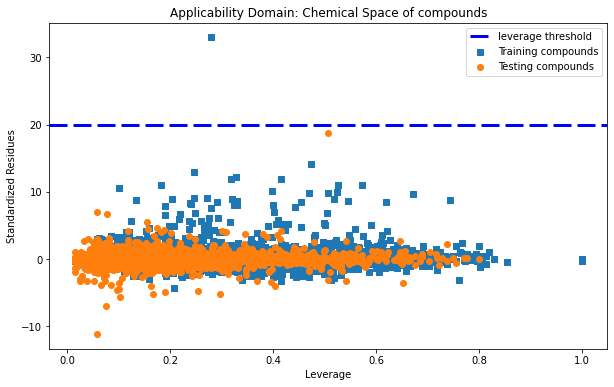

In [82]:
import matplotlib.pyplot as plt

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline


# Set the figure size in inches
plt.figure(figsize=(10,6))

plt.scatter(leverage, stdR_train, label = "Training compounds", marker = "s")
plt.scatter(subleverage, stdR_test, label = "Testing compounds", marker = "o")

plt.axhline(y = 20, color = 'blue', linestyle = '-', linewidth=3 , dashes=[6, 2], label= 'leverage threshold' ) #Note threshold is x=3 
#plt.axhline(y = 0, color = 'blue', linestyle = '-', linewidth=3)

# Set x and y axes labels
plt.xlabel('Leverage')
plt.ylabel('Standardized Residues')

plt.title('Applicability Domain: Chemical Space of compounds')
plt.legend()
plt.show()
